In [37]:
#1.a
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [38]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [39]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [40]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [41]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [42]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [43]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [44]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [45]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [46]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [47]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [48]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [49]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:04, 24.55it/s]                                                        


Epoch 1 of 100
Generator loss: 1.45158156, Discriminator loss: 0.88837674


118it [00:04, 23.73it/s]                                                        


Epoch 2 of 100
Generator loss: 3.17503741, Discriminator loss: 1.22380379


118it [00:04, 24.19it/s]                                                        


Epoch 3 of 100
Generator loss: 6.51876553, Discriminator loss: 0.22694377


118it [00:04, 24.00it/s]                                                        


Epoch 4 of 100
Generator loss: 4.84243177, Discriminator loss: 0.66549267


118it [00:04, 26.26it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


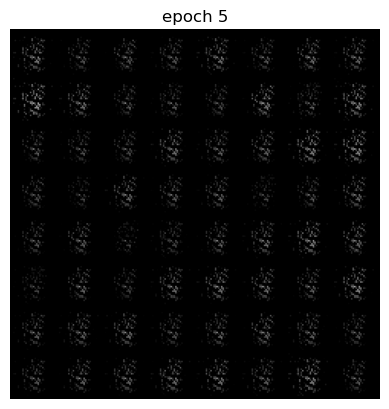

Epoch 5 of 100
Generator loss: 3.49331465, Discriminator loss: 0.87241131


118it [00:04, 25.40it/s]                                                        


Epoch 6 of 100
Generator loss: 1.46716677, Discriminator loss: 1.16961091


118it [00:04, 25.64it/s]                                                        


Epoch 7 of 100
Generator loss: 2.07494797, Discriminator loss: 0.86789300


118it [00:05, 22.75it/s]                                                        


Epoch 8 of 100
Generator loss: 2.46801835, Discriminator loss: 1.06069447


118it [00:04, 24.00it/s]                                                        


Epoch 9 of 100
Generator loss: 2.50863494, Discriminator loss: 0.94510405


118it [00:05, 23.36it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


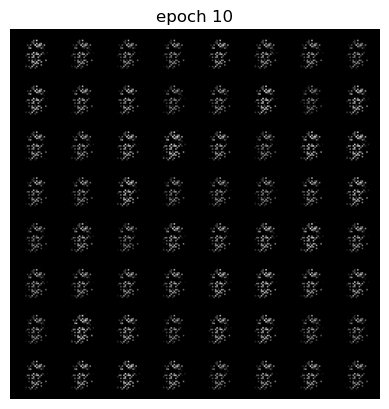

Epoch 10 of 100
Generator loss: 2.01455866, Discriminator loss: 1.02709860


118it [00:04, 25.03it/s]                                                        


Epoch 11 of 100
Generator loss: 2.17722511, Discriminator loss: 0.90294433


118it [00:04, 26.48it/s]                                                        


Epoch 12 of 100
Generator loss: 1.20369123, Discriminator loss: 1.21885516


118it [00:04, 24.08it/s]                                                        


Epoch 13 of 100
Generator loss: 1.19980615, Discriminator loss: 1.12298084


118it [00:04, 25.84it/s]                                                        


Epoch 14 of 100
Generator loss: 1.76333685, Discriminator loss: 0.85905904


118it [00:04, 25.21it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


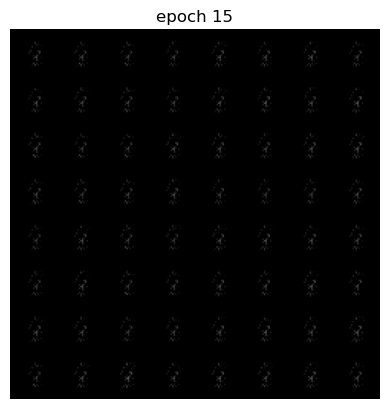

Epoch 15 of 100
Generator loss: 1.77844329, Discriminator loss: 0.78619871


118it [00:04, 24.07it/s]                                                        


Epoch 16 of 100
Generator loss: 2.71790329, Discriminator loss: 0.47310238


118it [00:04, 24.13it/s]                                                        


Epoch 17 of 100
Generator loss: 3.78722956, Discriminator loss: 0.43842672


118it [00:04, 24.40it/s]                                                        


Epoch 18 of 100
Generator loss: 3.52267224, Discriminator loss: 0.60261504


118it [00:04, 24.04it/s]                                                        


Epoch 19 of 100
Generator loss: 3.10080097, Discriminator loss: 0.58586039


118it [00:05, 23.24it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


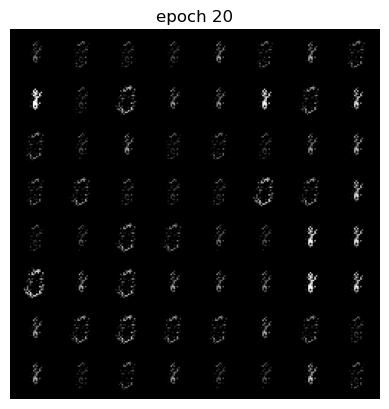

Epoch 20 of 100
Generator loss: 2.81605025, Discriminator loss: 0.47976926


118it [00:04, 23.78it/s]                                                        


Epoch 21 of 100
Generator loss: 3.50497467, Discriminator loss: 0.35760975


118it [00:05, 22.82it/s]                                                        


Epoch 22 of 100
Generator loss: 3.63277673, Discriminator loss: 0.34580173


118it [00:04, 26.55it/s]                                                        


Epoch 23 of 100
Generator loss: 3.43864845, Discriminator loss: 0.44709844


118it [00:04, 26.51it/s]                                                        


Epoch 24 of 100
Generator loss: 3.03227042, Discriminator loss: 0.67508235


118it [00:04, 26.65it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


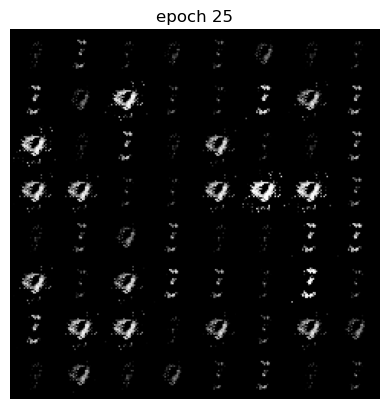

Epoch 25 of 100
Generator loss: 2.73257284, Discriminator loss: 0.50498362


118it [00:05, 23.00it/s]                                                        


Epoch 26 of 100
Generator loss: 3.42519798, Discriminator loss: 0.29792640


118it [00:04, 24.98it/s]                                                        


Epoch 27 of 100
Generator loss: 3.73585511, Discriminator loss: 0.38992303


118it [00:04, 23.68it/s]                                                        


Epoch 28 of 100
Generator loss: 3.23983535, Discriminator loss: 0.54507323


118it [00:05, 22.59it/s]                                                        


Epoch 29 of 100
Generator loss: 3.47286979, Discriminator loss: 0.33311343


118it [00:05, 23.00it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


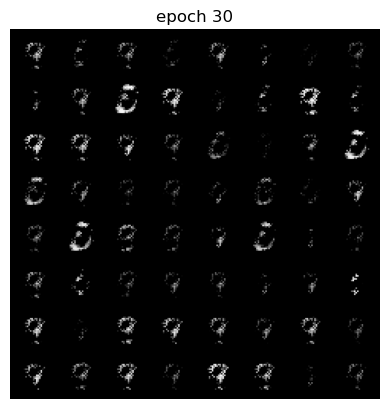

Epoch 30 of 100
Generator loss: 3.53013543, Discriminator loss: 0.43431352


118it [00:05, 23.09it/s]                                                        


Epoch 31 of 100
Generator loss: 2.95024115, Discriminator loss: 0.63315172


118it [00:04, 25.64it/s]                                                        


Epoch 32 of 100
Generator loss: 3.06460509, Discriminator loss: 0.51819043


118it [00:04, 25.87it/s]                                                        


Epoch 33 of 100
Generator loss: 2.80773286, Discriminator loss: 0.54429703


118it [00:04, 26.26it/s]                                                        


Epoch 34 of 100
Generator loss: 2.53412770, Discriminator loss: 0.58442085


118it [00:04, 26.54it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


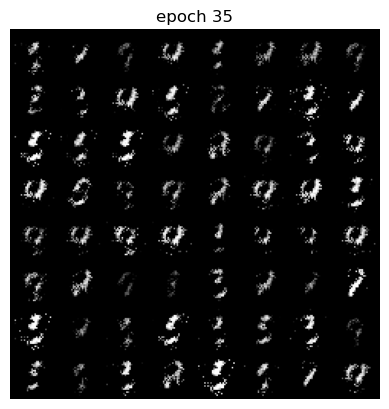

Epoch 35 of 100
Generator loss: 2.76832748, Discriminator loss: 0.55053429


118it [00:04, 26.35it/s]                                                        


Epoch 36 of 100
Generator loss: 2.67078775, Discriminator loss: 0.60473895


118it [00:04, 26.65it/s]                                                        


Epoch 37 of 100
Generator loss: 2.38609932, Discriminator loss: 0.61775430


118it [00:04, 26.18it/s]                                                        


Epoch 38 of 100
Generator loss: 2.44205353, Discriminator loss: 0.64242355


118it [00:04, 26.48it/s]                                                        


Epoch 39 of 100
Generator loss: 2.41649863, Discriminator loss: 0.68992918


118it [00:04, 26.57it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


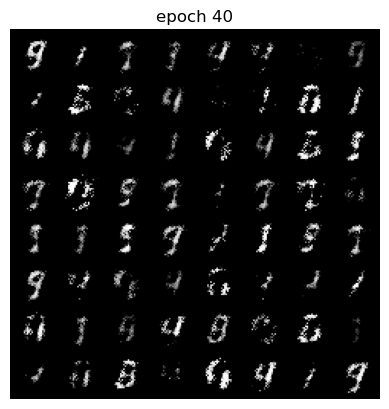

Epoch 40 of 100
Generator loss: 2.36492108, Discriminator loss: 0.70366293


118it [00:04, 26.08it/s]                                                        


Epoch 41 of 100
Generator loss: 2.46193926, Discriminator loss: 0.60679194


118it [00:04, 26.75it/s]                                                        


Epoch 42 of 100
Generator loss: 2.60743119, Discriminator loss: 0.60376319


118it [00:04, 27.08it/s]                                                        


Epoch 43 of 100
Generator loss: 2.53597737, Discriminator loss: 0.59750324


118it [00:04, 26.98it/s]                                                        


Epoch 44 of 100
Generator loss: 2.31744523, Discriminator loss: 0.64435028


118it [00:04, 26.64it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


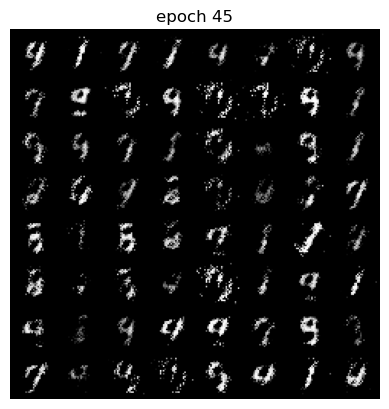

Epoch 45 of 100
Generator loss: 2.29557068, Discriminator loss: 0.67784140


118it [00:04, 25.40it/s]                                                        


Epoch 46 of 100
Generator loss: 2.25988418, Discriminator loss: 0.67874190


118it [00:04, 25.64it/s]                                                        


Epoch 47 of 100
Generator loss: 2.35295738, Discriminator loss: 0.64554289


118it [00:04, 24.68it/s]                                                        


Epoch 48 of 100
Generator loss: 2.39719726, Discriminator loss: 0.61318061


118it [00:04, 25.21it/s]                                                        


Epoch 49 of 100
Generator loss: 2.39097917, Discriminator loss: 0.59569590


118it [00:04, 24.52it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


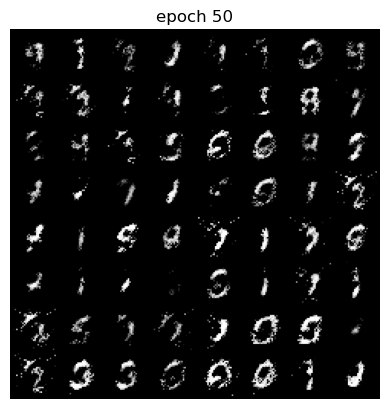

Epoch 50 of 100
Generator loss: 2.37295445, Discriminator loss: 0.64891414


118it [00:04, 25.43it/s]                                                        


Epoch 51 of 100
Generator loss: 2.04969704, Discriminator loss: 0.81328438


118it [00:04, 25.96it/s]                                                        


Epoch 52 of 100
Generator loss: 2.26111339, Discriminator loss: 0.69677052


118it [00:04, 26.63it/s]                                                        


Epoch 53 of 100
Generator loss: 2.38016771, Discriminator loss: 0.68363810


118it [00:04, 25.49it/s]                                                        


Epoch 54 of 100
Generator loss: 2.26357272, Discriminator loss: 0.66310414


118it [00:04, 23.68it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


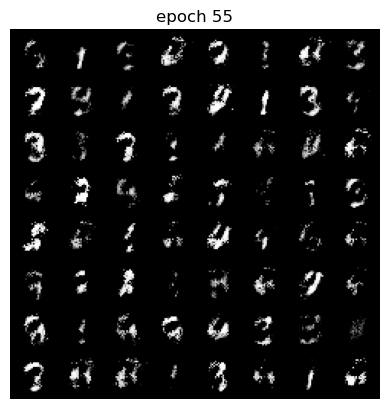

Epoch 55 of 100
Generator loss: 2.11003254, Discriminator loss: 0.78117856


118it [00:04, 23.71it/s]                                                        


Epoch 56 of 100
Generator loss: 1.90846039, Discriminator loss: 0.80318092


118it [00:04, 24.80it/s]                                                        


Epoch 57 of 100
Generator loss: 2.22381416, Discriminator loss: 0.72218722


118it [00:04, 24.31it/s]                                                        


Epoch 58 of 100
Generator loss: 2.12318597, Discriminator loss: 0.73618283


118it [00:04, 24.78it/s]                                                        


Epoch 59 of 100
Generator loss: 2.01911868, Discriminator loss: 0.72902232


118it [00:04, 25.55it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


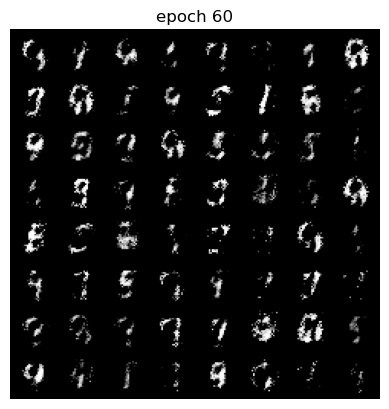

Epoch 60 of 100
Generator loss: 2.07360275, Discriminator loss: 0.83478499


118it [00:04, 24.13it/s]                                                        


Epoch 61 of 100
Generator loss: 1.98400150, Discriminator loss: 0.78503180


118it [00:04, 24.71it/s]                                                        


Epoch 62 of 100
Generator loss: 1.92078346, Discriminator loss: 0.81736089


118it [00:04, 25.02it/s]                                                        


Epoch 63 of 100
Generator loss: 2.00135664, Discriminator loss: 0.84565638


118it [00:04, 25.57it/s]                                                        


Epoch 64 of 100
Generator loss: 2.16670827, Discriminator loss: 0.72537296


118it [00:04, 25.44it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


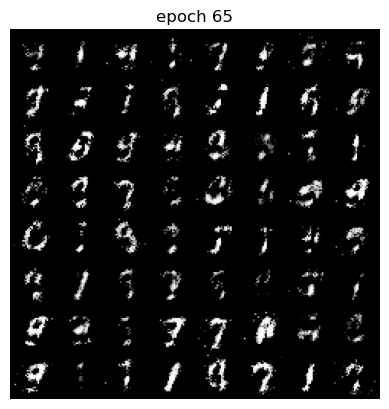

Epoch 65 of 100
Generator loss: 1.99915956, Discriminator loss: 0.77270551


118it [00:04, 24.38it/s]                                                        


Epoch 66 of 100
Generator loss: 2.01293791, Discriminator loss: 0.77072144


118it [00:04, 24.09it/s]                                                        


Epoch 67 of 100
Generator loss: 1.95535817, Discriminator loss: 0.79179641


118it [00:04, 24.88it/s]                                                        


Epoch 68 of 100
Generator loss: 2.02487472, Discriminator loss: 0.79330303


118it [00:04, 24.15it/s]                                                        


Epoch 69 of 100
Generator loss: 2.05356200, Discriminator loss: 0.74629240


118it [00:04, 23.98it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


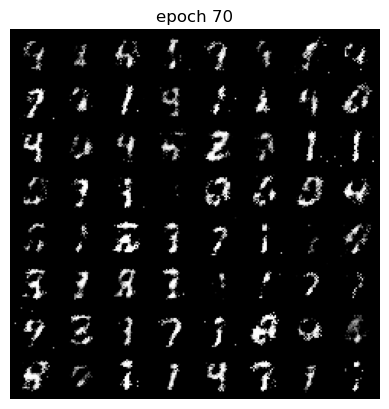

Epoch 70 of 100
Generator loss: 2.05145548, Discriminator loss: 0.79323455


118it [00:04, 24.23it/s]                                                        


Epoch 71 of 100
Generator loss: 1.90161211, Discriminator loss: 0.81859469


118it [00:04, 24.07it/s]                                                        


Epoch 72 of 100
Generator loss: 1.81084923, Discriminator loss: 0.85359232


118it [00:04, 23.83it/s]                                                        


Epoch 73 of 100
Generator loss: 1.86906450, Discriminator loss: 0.82985575


118it [00:04, 24.46it/s]                                                        


Epoch 74 of 100
Generator loss: 1.96023293, Discriminator loss: 0.82609492


118it [00:04, 23.98it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


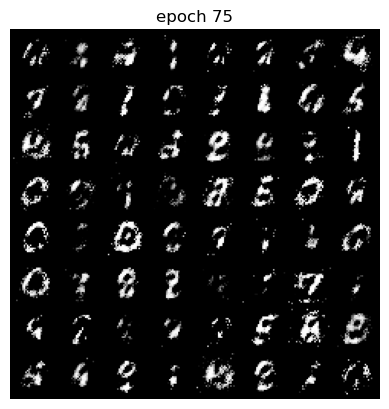

Epoch 75 of 100
Generator loss: 1.96080816, Discriminator loss: 0.79526383


118it [00:05, 22.98it/s]                                                        


Epoch 76 of 100
Generator loss: 1.90181199, Discriminator loss: 0.79756782


118it [00:04, 24.38it/s]                                                        


Epoch 77 of 100
Generator loss: 2.00402571, Discriminator loss: 0.79324323


118it [00:04, 24.15it/s]                                                        


Epoch 78 of 100
Generator loss: 1.97123027, Discriminator loss: 0.80527581


118it [00:04, 24.98it/s]                                                        


Epoch 79 of 100
Generator loss: 1.95515048, Discriminator loss: 0.79073559


118it [00:04, 24.41it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


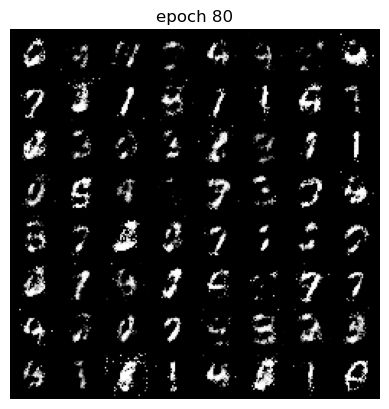

Epoch 80 of 100
Generator loss: 1.89325111, Discriminator loss: 0.78274852


118it [00:04, 25.75it/s]                                                        


Epoch 81 of 100
Generator loss: 1.77214782, Discriminator loss: 0.83697745


118it [00:04, 24.19it/s]                                                        


Epoch 82 of 100
Generator loss: 1.81733548, Discriminator loss: 0.82065370


118it [00:04, 25.89it/s]                                                        


Epoch 83 of 100
Generator loss: 1.94136088, Discriminator loss: 0.78495389


118it [00:04, 26.34it/s]                                                        


Epoch 84 of 100
Generator loss: 1.84282584, Discriminator loss: 0.82222483


118it [00:04, 25.58it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


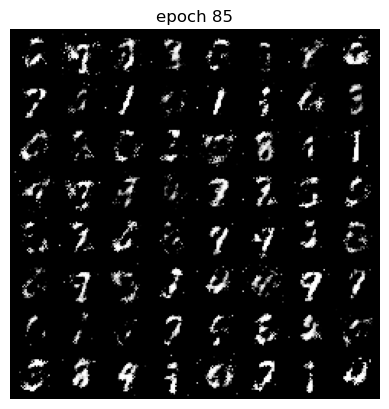

Epoch 85 of 100
Generator loss: 1.76840027, Discriminator loss: 0.86113912


118it [00:04, 25.52it/s]                                                        


Epoch 86 of 100
Generator loss: 1.61201447, Discriminator loss: 0.89148191


118it [00:04, 24.11it/s]                                                        


Epoch 87 of 100
Generator loss: 1.74333208, Discriminator loss: 0.87119125


118it [00:04, 24.59it/s]                                                        


Epoch 88 of 100
Generator loss: 1.57315984, Discriminator loss: 0.95179428


118it [00:05, 23.37it/s]                                                        


Epoch 89 of 100
Generator loss: 1.50150183, Discriminator loss: 0.93096947


118it [00:04, 25.30it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


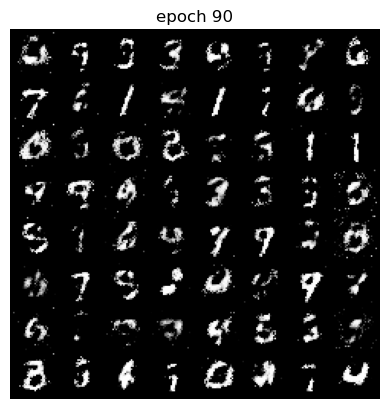

Epoch 90 of 100
Generator loss: 1.52462232, Discriminator loss: 0.94124822


118it [00:04, 24.49it/s]                                                        


Epoch 91 of 100
Generator loss: 1.48649490, Discriminator loss: 0.97293519


118it [00:04, 26.89it/s]                                                        


Epoch 92 of 100
Generator loss: 1.51787220, Discriminator loss: 0.94132690


118it [00:04, 26.15it/s]                                                        


Epoch 93 of 100
Generator loss: 1.55476147, Discriminator loss: 0.95545951


118it [00:04, 25.69it/s]                                                        


Epoch 94 of 100
Generator loss: 1.43720486, Discriminator loss: 0.97211474


118it [00:04, 25.75it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


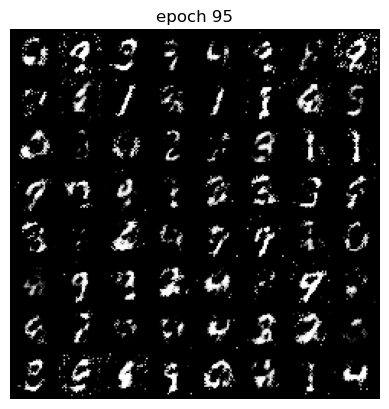

Epoch 95 of 100
Generator loss: 1.57993519, Discriminator loss: 0.93663711


118it [00:04, 26.71it/s]                                                        


Epoch 96 of 100
Generator loss: 1.58769934, Discriminator loss: 0.95085643


118it [00:04, 25.86it/s]                                                        


Epoch 97 of 100
Generator loss: 1.51411270, Discriminator loss: 0.98194436


118it [00:04, 25.97it/s]                                                        


Epoch 98 of 100
Generator loss: 1.57388193, Discriminator loss: 0.94067850


118it [00:04, 25.81it/s]                                                        


Epoch 99 of 100
Generator loss: 1.64468174, Discriminator loss: 0.90821283


118it [00:04, 26.70it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


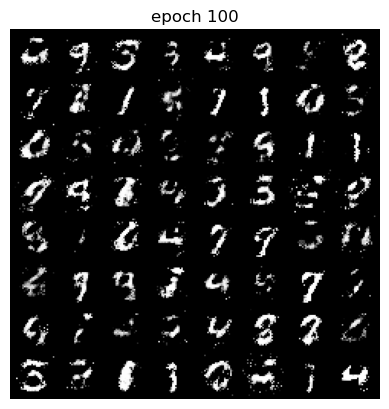

Epoch 100 of 100
Generator loss: 1.72257160, Discriminator loss: 0.89839169


In [50]:
torch.manual_seed(7)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    optim_g.zero_grad()
    batch =  output.shape[0]
    
    z = create_noise(batch, 128)
    labelz = label_real(batch)
    xfake = generator(z)
    outz = discriminator(xfake)
    lossz = criterion(outz, labelz)

    Gloss = lossz
    Gloss.backward()
    optim_g.step()

    return  Gloss.data.item()
    
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    optim_d.zero_grad()
    batch =  output.shape[0]
    
    labelx = label_real(batch)
    
    outx = discriminator(output)
    lossx = criterion(outx, labelx)

    z = create_noise(batch, 128)
    labelz = label_fake(batch)
    
    xfake = generator(z)
    outz = discriminator(xfake)
    lossz = criterion(outz, labelz)

    Dloss = lossx + lossz

    Dloss.backward()
    optim_d.step()

    return  Dloss.data.item()
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        for _ in range(k):
            data_ = data[0][torch.randperm(data[0].size()[0])]
            data_ = data_[:sample_size, :, :, :]
            loss_d += discriminator_loss(data_, None)
        loss_g += generator_loss(data_, None)
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [51]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [52]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

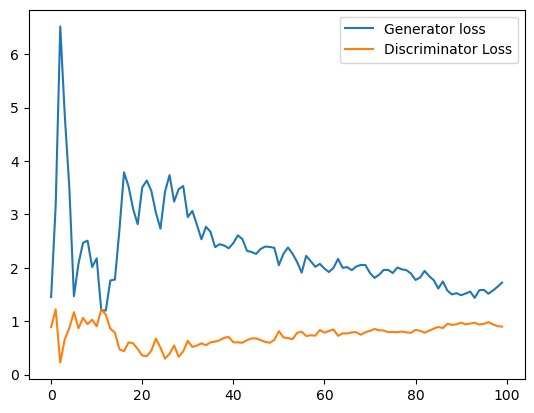

In [53]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')